# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [25]:
import tensorflow as tf
tf.__version__

'2.14.0'

# Q2. Load the Wine Quality dataset and explore its dimensions.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [28]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


# Q3. Check for null values, identify categorical variables, and encode them.

In [30]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
df.duplicated().value_counts()

False    1359
True      240
Name: count, dtype: int64

In [32]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,bad
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,bad
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,bad
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,bad
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,bad
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,bad
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,bad


In [34]:
df.drop_duplicates(keep='first' , inplace=True)
df.duplicated().sum()

0

In [36]:
from sklearn.preprocessing import LabelEncoder

scaler = LabelEncoder()
df['quality'] = scaler.fit_transform(df['quality'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 132.7 KB


In [37]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [38]:
df.quality.unique()

array([0, 1])

# Q4. Separate the features and target variables from the dataframe.

In [39]:
X = df.drop('quality' , axis=1)
y = df['quality']

# Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [56]:
from sklearn.model_selection import train_test_split

# Perform train-test split to create training and temporary set (temp_set)
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.3,random_state=42)


# Further split temp_set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [57]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (951, 11) (951,)
Validation set shape: (204, 11) (204,)
Test set shape: (204, 11) (204,)


In [58]:
951 + 204 + 204

1359

# Q6. Perform scaling on the dataset.

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
X_validation_scaled = sc.transform(X_val)

# Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.
# Q8. Create a Sequential model and add all the layers to it.

In [62]:
X_train_scaled.shape[1]

11

In [70]:
LAYERS = [
    tf.keras.layers.Dense(units=11 , input_dim=11 , activation='relu' , name='InputLayer'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=64 , activation='relu' , name='HiddenLayer1'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=32 , activation='relu' , name='HiddenLayer2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=1 , activation='sigmoid' , name='OutputLayer')
]

model = tf.keras.models.Sequential(LAYERS)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [82]:
from tensorflow.keras.callbacks import TensorBoard
log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [83]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [84]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_checkpoint_callback = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)

# Q12. Print the model summary.

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 11)                132       
                                                                 
 batch_normalization_6 (Bat  (None, 11)                44        
 chNormalization)                                                
                                                                 
 HiddenLayer1 (Dense)        (None, 64)                768       
                                                                 
 batch_normalization_7 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 HiddenLayer2 (Dense)        (None, 32)                2080      
                                                                 
 batch_normalization_8 (Bat  (None, 32)               

# Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
# Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [85]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [90]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_validation_scaled, y_val),
    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback]
)

Epoch 1/10
30/30 [==============================] - 0s 15ms/step - loss: 0.4429 - accuracy: 0.7886 - val_loss: 0.5625 - val_accuracy: 0.7157
Epoch 2/10
30/30 [==============================] - 0s 15ms/step - loss: 0.4409 - accuracy: 0.8013 - val_loss: 0.5531 - val_accuracy: 0.6961
Epoch 3/10
30/30 [==============================] - 0s 13ms/step - loss: 0.4457 - accuracy: 0.7834 - val_loss: 0.5563 - val_accuracy: 0.7010
Epoch 4/10
30/30 [==============================] - 0s 14ms/step - loss: 0.4200 - accuracy: 0.7781 - val_loss: 0.5494 - val_accuracy: 0.7010
Epoch 5/10
30/30 [==============================] - 0s 14ms/step - loss: 0.4339 - accuracy: 0.7950 - val_loss: 0.5442 - val_accuracy: 0.7108
Epoch 6/10
30/30 [==============================] - 0s 12ms/step - loss: 0.4274 - accuracy: 0.7886 - val_loss: 0.5524 - val_accuracy: 0.7059
Epoch 7/10
30/30 [==============================] - 0s 12ms/step - loss: 0.4361 - accuracy: 0.7928 - val_loss: 0.5391 - val_accuracy: 0.6961
Epoch 8/10
30

# Q16. Get the model's parameters.

In [91]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'InputLayer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'InputLayer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 11),
    'units': 11,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build_con

# Q17. Store the model's training history as a Pandas DataFrame.

In [92]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.442947,0.788644,0.562479,0.715686
1,0.440853,0.801262,0.553080,0.696078
2,0.445686,0.783386,0.556282,0.700980
3,0.419964,0.778128,0.549355,0.700980
4,0.433877,0.794953,0.544235,0.710784


# Q18. Plot the model's training history.

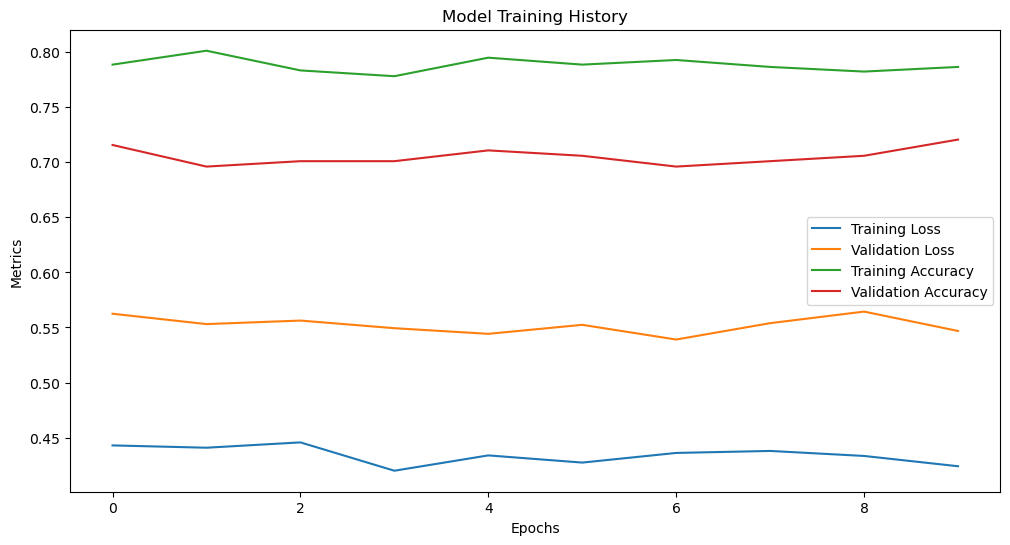

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Model Training History')
plt.legend()
plt.show()


# Q19. Evaluate the model's performance using the test data.

In [94]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 [==============================] - 0s 4ms/step - loss: 0.6551 - accuracy: 0.6912
Test Loss: 0.6550873517990112
Test Accuracy: 0.6911764740943909
